# <center> <h1>Heart Attack Analysis & Prediction Dataset</h1> </center>

<div style="text-align:center">
    <img src="imagenn.jpg" style="width:75%">
</div>

# Dataset Description 
- Age : Age of the patient

* Sex : Sex of the patient

* cp : Chest Pain type

>Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br>

* trtbps : resting blood pressure (in mm Hg)

* chol: cholesterol in mg/dl fetched via BMI sensor

* fbs: (fasting blood sugar > 120 mg/dl)
>1 = true<br>
>0 = false<b>

* rest_ecg: resting electrocardiographic results
    > Value 0: normal<br>
    > Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    >Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>

* thalach: maximum heart rate achieved<br>

* exang: exercise induced angina<br>
    >1 = yes<br>
    0 = no<br>
    
* old peak: ST depression induced by exercise relative to rest

* slp: the slope of the peak exercise ST segment
    >0 = unsloping<br>
    >1 = flat<br>
    >2 = downsloping<br>
    
* caa: number of major vessels (0-3)

* thall : thalassemia
    >0 = null<br>
    1 = fixed defect<br>
    2 = normal<br>
    3 = reversable defect<br>
    
* output: diagnosis of heart disease (angiographic disease status)<br>
    >0: < 50% diameter narrowing. less chance of heart disease <br>
    >1: > 50% diameter narrowing. more chance of heart disease 
   

# Importar data 

In [141]:
# Import library
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [142]:
datos = pd.read_csv("heart.csv")
datos.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
# Sape of data set
datos.shape

(303, 14)

# Data validation

## Tipos de variables 

In [144]:
datos.dtypes.value_counts()

int64      13
float64     1
dtype: int64

Normally the object variables are synonymous with categories, in this case, they are not presented so you can continue with the next step

## Null values

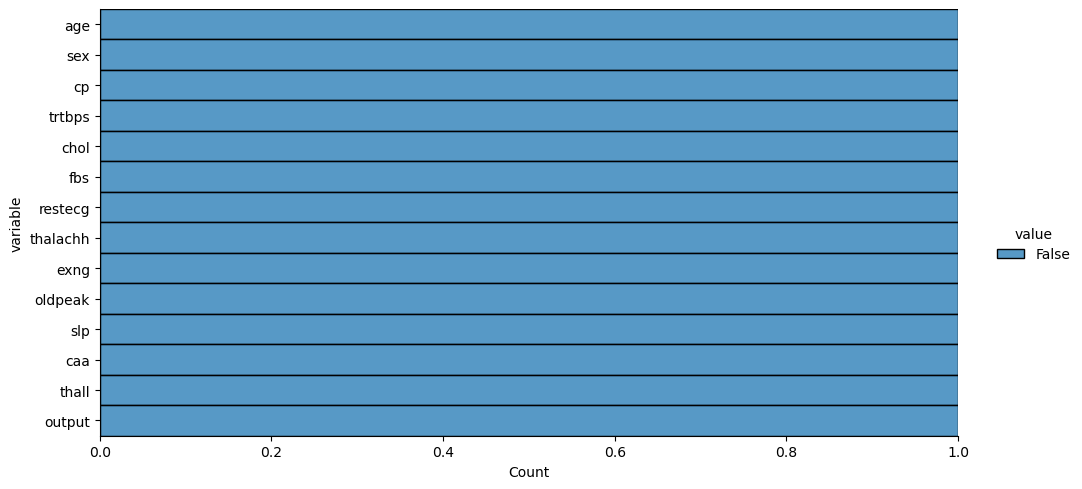

In [145]:
(
    datos
    .isnull()
    .melt()
    .pipe(
        lambda datos:(
            sns.displot(
                data= datos,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

In [146]:
datos.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Duplicate values

In [147]:
datos[datos.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [148]:
# drop duplicate values 
datos.drop_duplicates(keep='first',inplace=True)

Once no null or missing values are present, the data transformation continues

# Fraphical analysis

In [149]:
# import librarys
import seaborn as sns
import matplotlib.pyplot as plt

## Values outliers

## Hist

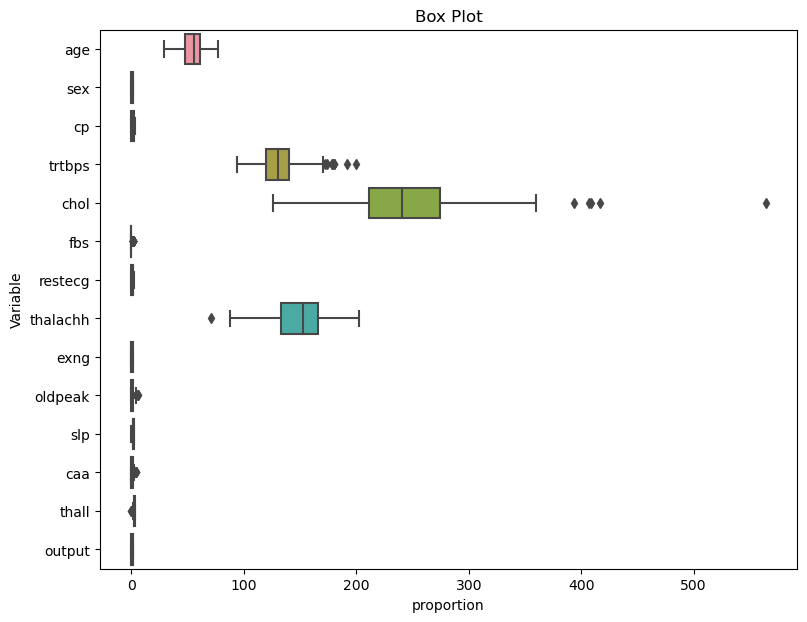

In [150]:
# Set the size of the chart
fig = plt.gcf()
fig.set_size_inches(9, 7)

sns.boxplot(
    data=datos,
    orient="h")

# Adjust the chart title
plt.title("Box Plot")

# Adjust the labels of the axes
plt.xlabel("proportion")
plt.ylabel("Variable")
plt.show()

Note:<br>
The variables cholesterol and blood pressure at rest present atypical values, however these will not be eliminated, since the data is not very large and we do not want to lose predictive power

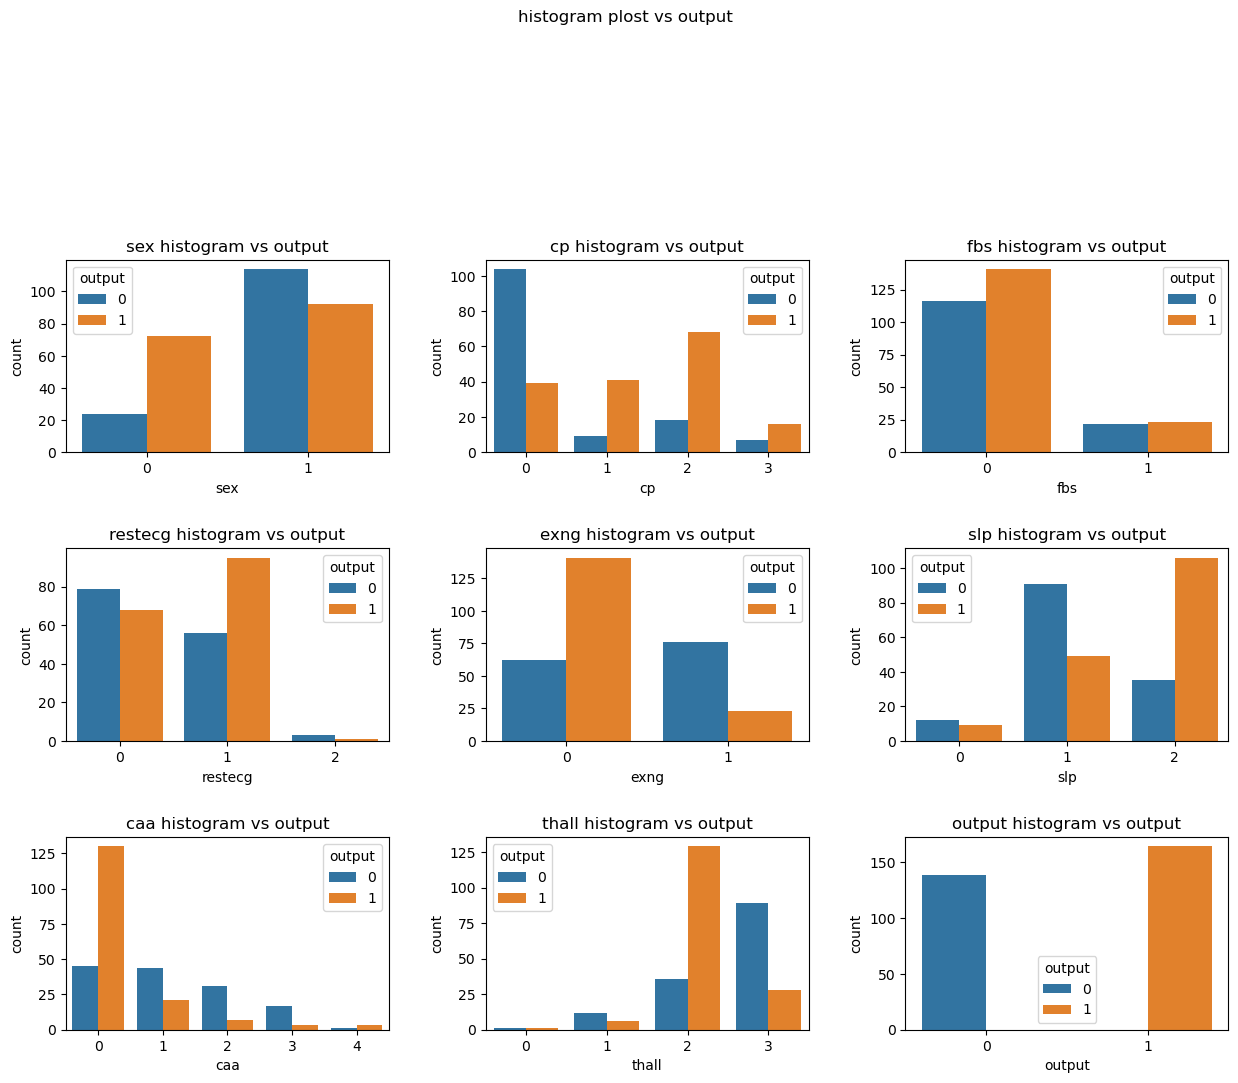

In [151]:
# list of features
vars_to_plot = ['sex', 'cp', 'fbs', 'restecg','exng', 'slp', 'caa', 'thall', 'output']

# size of plot
fig = plt.figure(figsize=(15, 25))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(7, 3, i+1)
    sns.countplot(data=datos, x=var, hue='output')
    plt.title(f'{var} histogram vs output')
    
plt.suptitle('histogram plost vs output ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note:<br>
- Sample has more men than women<br>
- Women are more likely to have a higher probability of having cardiac problems.<br>
- Typical anginal pain patients are more likely to have the problem.<br>
- Patients with fasting blood sugar $> 120$  "fba" are more likely to have<br>

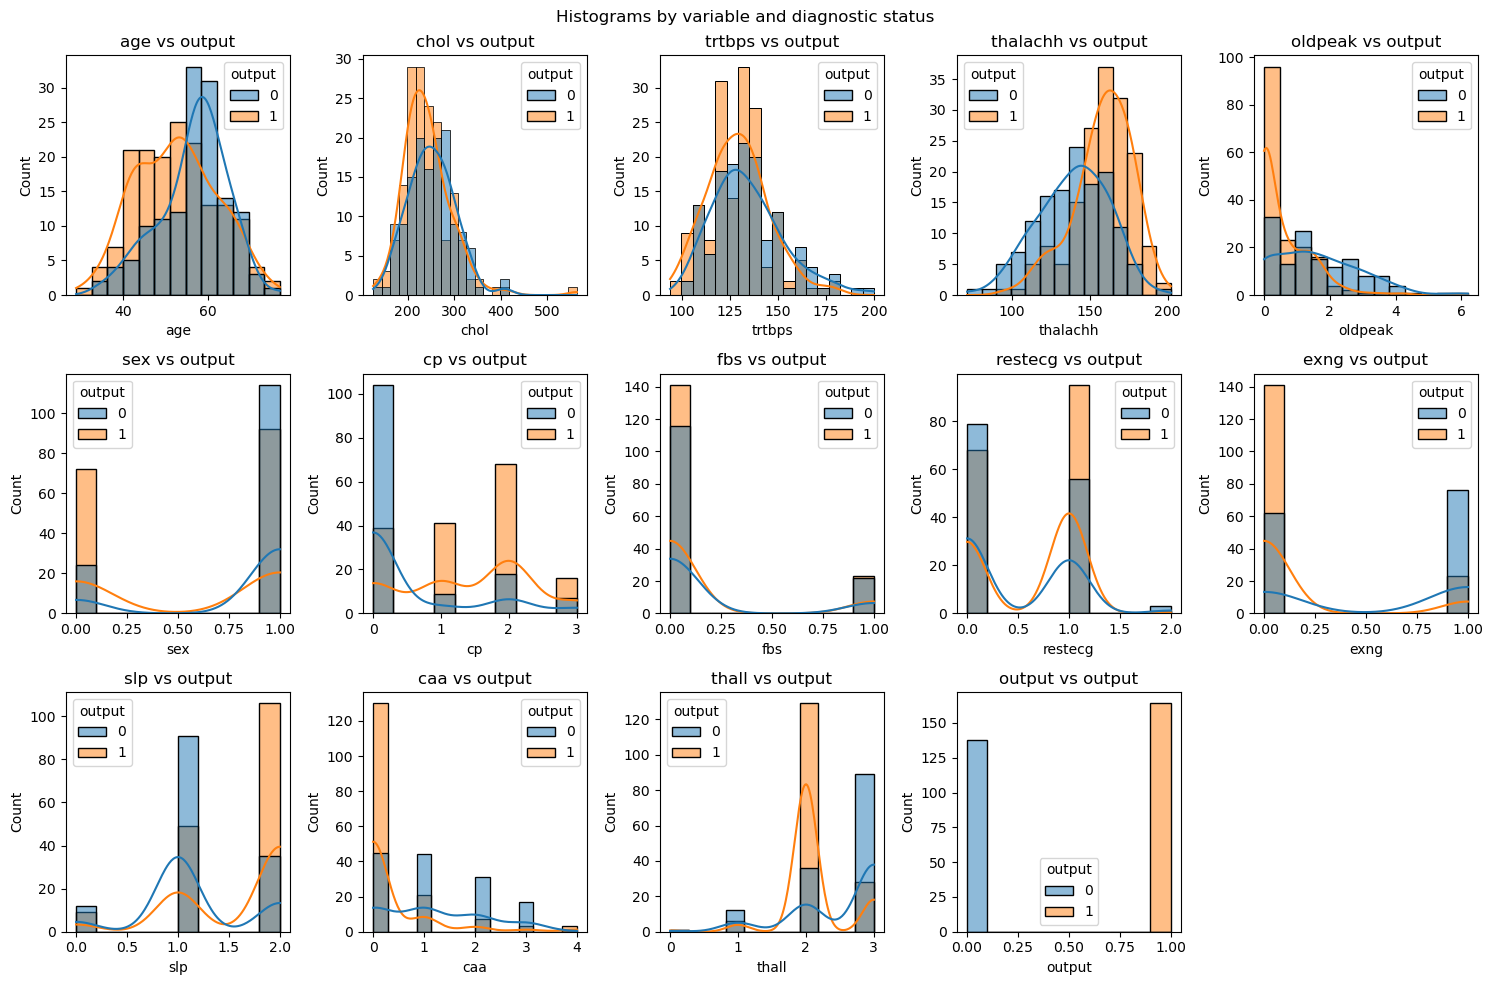

In [152]:
# List of variables to make the distribution chart 
vars_to_plot = ['age', 'chol','trtbps', 'thalachh', 'oldpeak','sex', 'cp', 'fbs', 'restecg','exng', 'slp', 'caa', 'thall', 'output']

# size
fig = plt.figure(figsize=(15, 10))

# Loop
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=datos, x=var, hue='output', kde=True)
    plt.title(f'{var} vs output')

plt.suptitle('Histograms by variable and diagnostic status')
plt.tight_layout() # Adjust the space between images
plt.show()

Nota:<br>
las variables numericas presenta compotamiento normal, pero su proporción es diferete por ende de normalizara con minmax

# Transforming data

## Scaling data

In [153]:
# copy the data 
df_copy = datos.copy()

In [154]:
from sklearn.preprocessing import MinMaxScaler

#Create objectscaler 
scaler = MinMaxScaler()

# Fit data
df_scaled = scaler.fit_transform(df_copy)

#convert array to data frame
df_scaled  = pd.DataFrame(df_scaled)

# Reset labels to data frame
df_scaled.columns = datos.columns
df_scaled.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


# Configuracion de variables test y train

In [155]:
# define the variable 'x' and 'y'

X = df_scaled.drop('output', axis=1)
y = df_copy['output']

In [156]:
df_copy.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [157]:
# Spliting data train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create models

## load models and metrics load models and metrics 

In [158]:
# import classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Train models

In [159]:
# Save all models in a tuple
models = [
    ('Logistic Regression', LogisticRegression(max_iter= 100000)),
    ('Random Forest Classifier',RandomForestClassifier()),
    ('Naive Bayes Gaussiano', GaussianNB()),    
    ('K-Nearest Neighbors ',KNeighborsClassifier()),    
    ('Support Vector_Machine', SVC(probability=True)),
    ('XGB Classifier', XGBClassifier()),
    ('Categorical Boosting', CatBoostClassifier(verbose=0)),
    ('Light Gradient Boosting Machine' ,LGBMClassifier()),
    ('Decision Tree Classifier',DecisionTreeClassifier())
]
results = []  # create empty list

# Training Loop 
for i, model in models:
    # fit the model
    model.fit(X_train, y_train)
    
    #calculate score of trainin, test and cros validation
    train_score = model.score(X_train, y_train)    
    proba = model.predict_proba(X_test)
    
    y_pred =[] # empty container  
    for p in proba: #loop for proba and calculate cv score
        if p[0] > p[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
            
    test_score = accuracy_score(y_test, y_pred)    
    cv_score = cross_val_score(model, X, y, cv= 10).mean()

    #salve rresults on data frame 
    results.append((i, train_score, test_score, cv_score))
    
# crear data fame with score models
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy Score in Train', 'Accuracy Score in Test', 'Cross Validation Mean'])

# Show results
df_results


,Model,Accuracy Score in Train,Accuracy Score in Test,Cross Validation Mean
0,Logistic Regression,0.850622,0.786885,0.814516
1,Random Forest Classifier,1.000000,0.770492,0.837634
2,Naive Bayes Gaussiano,0.838174,0.819672,0.807957
3,K-Nearest Neighbors,0.883817,0.786885,0.817742
4,Support Vector_Machine,0.892116,0.721311,0.817849
5,XGB Classifier,1.000000,0.770492,0.791075
6,Categorical Boosting,0.995851,0.770492,0.844409
7,Light Gradient Boosting Machine,1.000000,0.754098,0.810753
8,Decision Tree Classifier,1.000000,0.688525,0.774516


Notice:
- As you can see there is some models that are overfitting like: Decision Tree Classifier, XGB Classifier etc
- The most important information in the DataFrame is that the $Categorical Boosting$ algorithm have the highest "Cross Validation Mean", and the model is not overfitting, so you got it


##  hyperparameter tuning

Let's try to get the best parameter for our model 

In [160]:
from sklearn.model_selection import RandomizedSearchCV 

params = {
    'iterations': [10, 50, 100, 20, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 1, 10],
    'depth': [3, 5, 7, 9]
}

Cat_Boosting = GridSearchCV(CatBoostClassifier(verbose=0),params, cv = 5, n_jobs= -1)
Cat_Boosting.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F49F914A00>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7, 9],
                         'iterations': [10, 50, 100, 20, 300, 400, 500],
                         'learning_rate': [0.01, 0.1, 1, 10]})

In [161]:
# get beter params
print(f"{Cat_Boosting.best_params_}")
print(f"The best score: {Cat_Boosting.best_score_}")

{'depth': 3, 'iterations': 400, 'learning_rate': 0.01}
The best score: 0.855017006802721


# Importance of features in the classification model

In [162]:
# Adjust final model with best parameters
cat_model_final = CatBoostClassifier(iterations=Cat_Boosting.best_params_['iterations'],
                                      learning_rate=Cat_Boosting.best_params_['learning_rate'],
                                      depth=Cat_Boosting.best_params_['depth'], verbose = 0)

cat_model_final.fit(X_train, y_train)

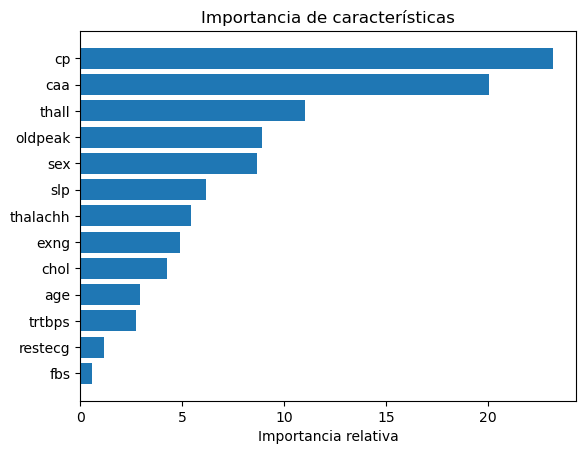

In [163]:
# Plot
feature_importance = cat_model_final.get_feature_importance()
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de características')
plt.show()


The implemented model indicates that the most important aspects to highlight when assessing a patient are:<br>
-  cp “Chest_Pain_type” <br>
- caa  “number of major vessels” <br>
- thall thalassemia<br>
- old peak “ST depression induced by exercise relative to rest”<br>

And finally, the variables that provide the least information about this condition are:<br>
- fbs: “fasting blood sugar > 120 mg/dl”.<br>
- rest_ecg: resting electrocardiographic results

# Make any predicct 

In [164]:
prediccion = Cat_Boosting.predict([26, 1, 0, 120, 200, 0, 1, 150, 1, 1.4, 2, 0, 1])
prediccion

0

In [165]:
# create data frame
labels = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
patient_1 =  [26, 1, 0, 120, 200, 0, 1, 150, 1, 1.4, 2, 0, 1]
patient_2 =  [80, 1, 2, 120, 260, 0, 1, 150, 1, 1.4, 2, 0, 1]
patient_3 =  [85, 0, 2, 150, 260, 0, 1, 150, 1, 1.4, 2, 0, 1]

In [166]:
# trasnform to dataframe
df = pd.DataFrame([patient_1, patient_2, patient_3], columns=labels, index=['patient 1', 'patient 2', 'patient 3'])
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
patient 1,26,1,0,120,200,0,1,150,1,1.4,2,0,1
patient 2,80,1,2,120,260,0,1,150,1,1.4,2,0,1
patient 3,85,0,2,150,260,0,1,150,1,1.4,2,0,1


In [167]:
# predit 
prediccion = Cat_Boosting.predict(df)

# convert to Data Frame
prediccion = pd.DataFrame(prediccion, columns = ['Estimate'], index= df.index)

# Show estimate
prediccion

,Estimate
patient 1,0
patient 2,1
patient 3,1
